In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

In [26]:
df = pd.read_csv('result.csv')
df["duration_mins"] = df["duration_ms"]/60000
df.drop(columns="duration_ms", inplace=True)
df = df.sort_values(by='year', ascending=True)
df

,acousticness,artists,danceability,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year,Song,duration_mins
6923,0.974000,bing crosby,0.111,0.184,0.045600,8,0.1110,-15.011,27.0,0.0344,76.416,0.214,1945,silent night,2.614450
2092,0.657000,doris day,0.834,0.284,0.000002,3,0.0676,-13.497,32.0,0.1020,92.224,0.684,1945,everybody loves a lover,2.674450
6151,0.848000,roy orbison,0.400,0.205,0.000000,7,0.4000,-11.794,1.0,0.0270,79.545,0.357,1947,pretty paper,2.756000
2984,0.799000,gene autry,0.834,0.372,0.000000,1,0.2750,-11.990,40.0,0.0358,96.628,0.976,1947,here comes santa claus right down santa claus ...,2.504450
6511,0.883000,gene autry,0.632,0.159,0.000000,8,0.2220,-14.056,35.0,0.0492,142.110,0.644,1947,rudolph the rednosed reindeer,3.112217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5441,0.055000,lil uzi vert,0.771,0.654,0.000000,8,0.2140,-6.976,86.0,0.2980,155.047,0.573,2020,myron,3.749250
2570,0.502000,rod wave,0.586,0.547,0.000000,4,0.0963,-7.383,75.0,0.0950,75.911,0.350,2020,girl of my dreams,2.663617
5430,0.230000,breland,0.883,0.299,0.000008,2,0.1620,-8.382,68.0,0.1050,136.982,0.550,2020,my truck,2.638817
3118,0.000592,lil uzi vert,0.929,0.563,0.000000,9,0.2440,-7.428,64.0,0.4900,129.957,0.353,2020,homecoming,3.564750


In [27]:
df = df.drop(columns=['artists', 'Song'])

                  acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000     -0.232391 -0.591036         -0.015512   
danceability         -0.232391      1.000000  0.121166          0.025778   
energy               -0.591036      0.121166  1.000000          0.013456   
instrumentalness     -0.015512      0.025778  0.013456          1.000000   
key                  -0.008644      0.018227  0.012604          0.009163   
liveness             -0.010119     -0.108555  0.130224         -0.023780   
loudness             -0.393225      0.067361  0.691661         -0.115793   
popularity           -0.261853      0.139397  0.182318         -0.081350   
speechiness          -0.139985      0.264995  0.110565         -0.038794   
tempo                -0.116317     -0.179835  0.168471         -0.001542   
valence              -0.123837      0.407752  0.332190          0.056333   
year                 -0.390667      0.183645  0.299607         -0.109387   
duration_min

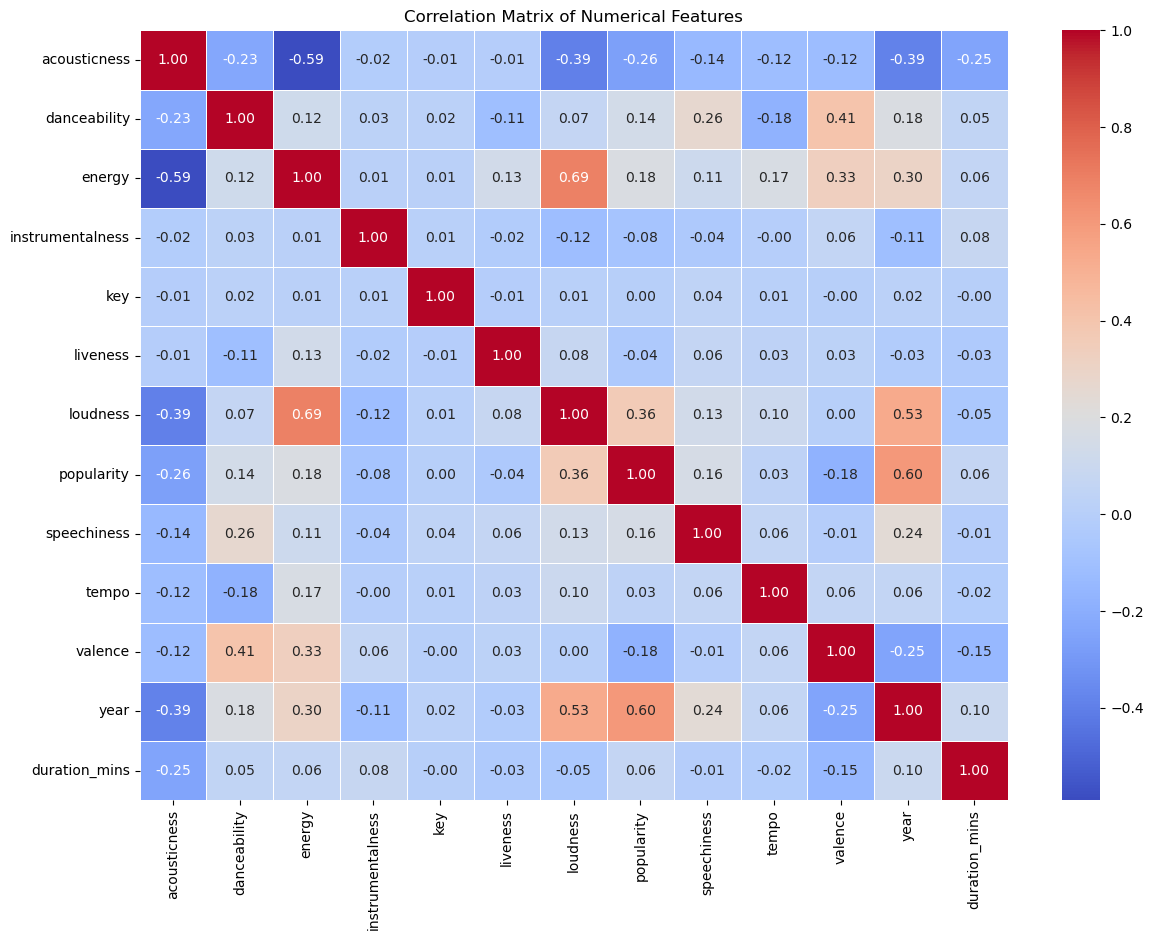

Correlation with Popularity:
 popularity          1.000000
year                0.603885
loudness            0.362830
energy              0.182318
speechiness         0.160931
danceability        0.139397
duration_mins       0.062887
tempo               0.033210
key                 0.004468
liveness           -0.042276
instrumentalness   -0.081350
valence            -0.179206
acousticness       -0.261853
Name: popularity, dtype: float64


In [28]:
from matplotlib import pyplot as plt

correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(14, 10))

# seaborn 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
popularity_corr = correlation_matrix['popularity'].sort_values(ascending=False)
print("Correlation with Popularity:\n", popularity_corr)

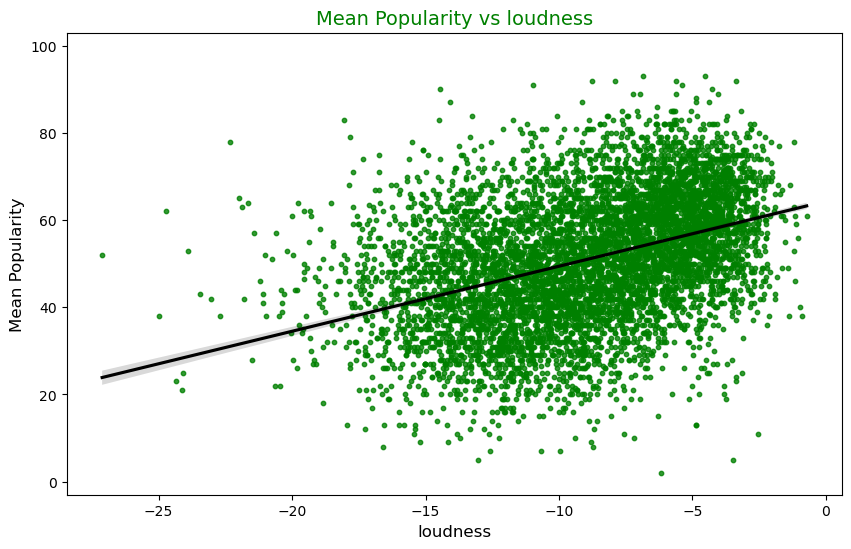

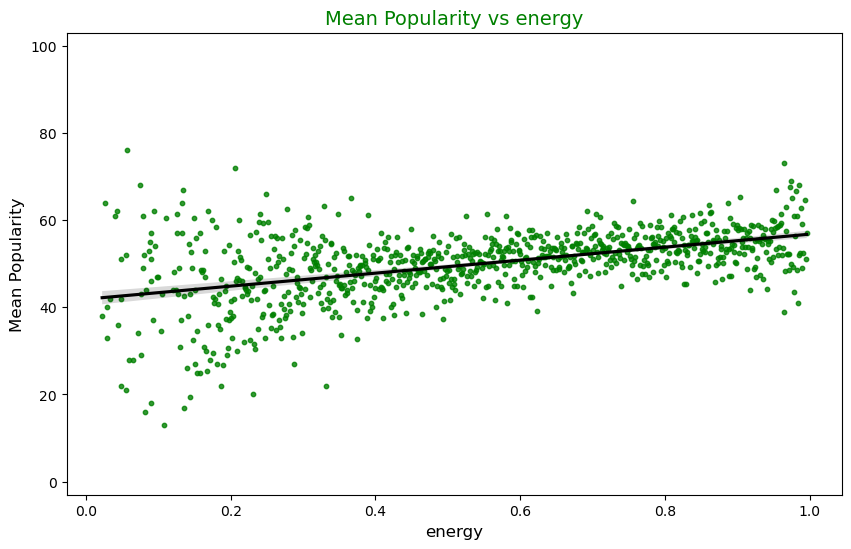

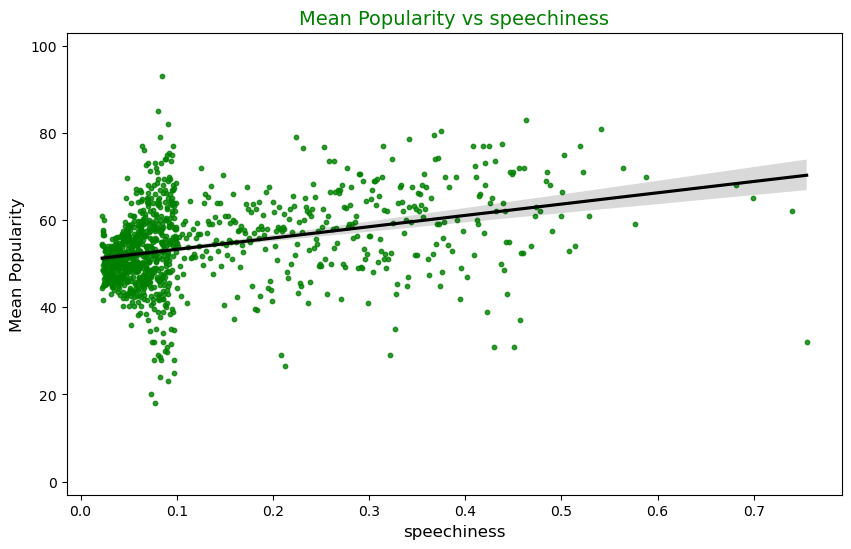

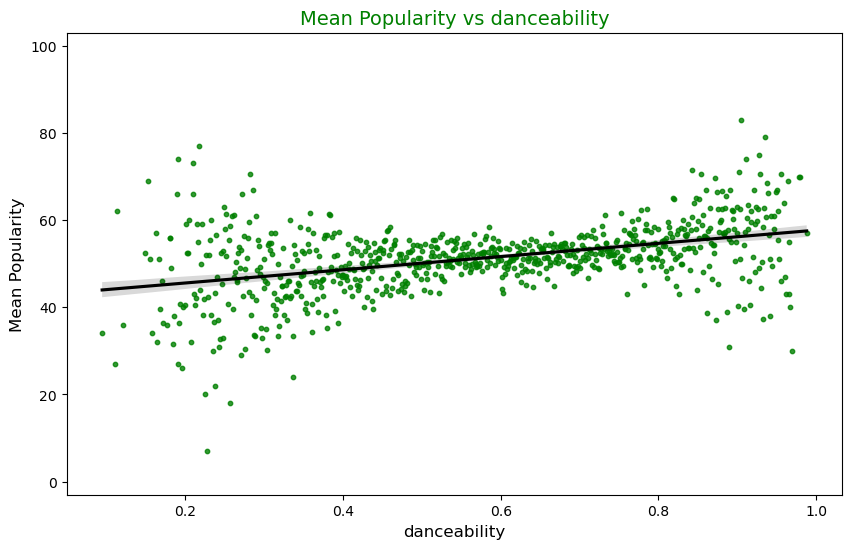

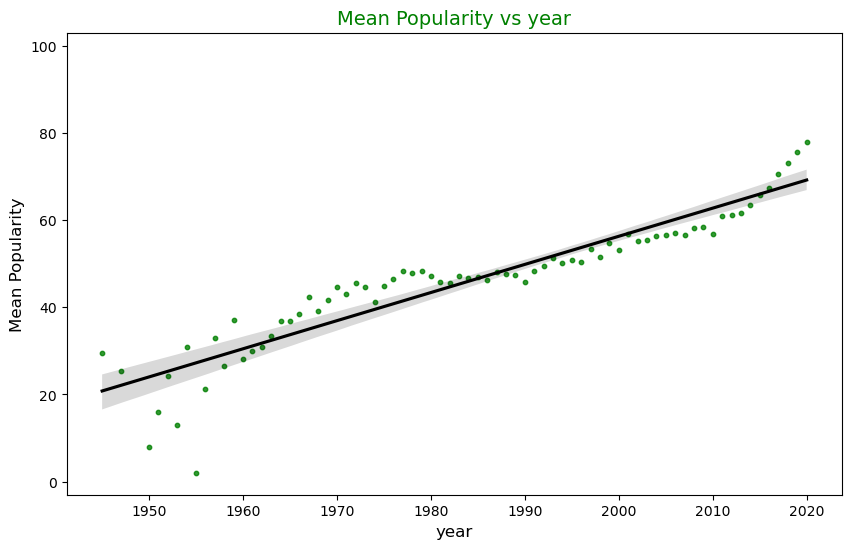

In [29]:

def regress_plot(x, y, data, xlab, ylab, titl):
    # Group data by x and calculate the mean of y
    data = data.groupby(x)[y].mean().reset_index()
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x, y=y, data=data, scatter_kws={'color': 'g', "s": 10}, line_kws={'color': 'black'})
    plt.xlabel(xlab, fontsize=12)
    plt.ylabel(ylab, fontsize=12)
    plt.title(titl, fontsize=14, color='green')
    plt.ylim(-3, 103)
    plt.show()

# Assuming df is your DataFrame containing the data
df_filtered = df[(df['year'] >= 1945) & (df['year'] <= 2020)]

# List of features to plot, including 'year'
features = ['loudness', 'energy', 'speechiness', 'danceability', 'year']

# Plotting each feature against popularity
for feature in features:
    regress_plot(
        x=feature,
        y='popularity',
        data=df_filtered,
        xlab=feature,
        ylab='Mean Popularity',
        titl=f'Mean Popularity vs {feature}'
    )


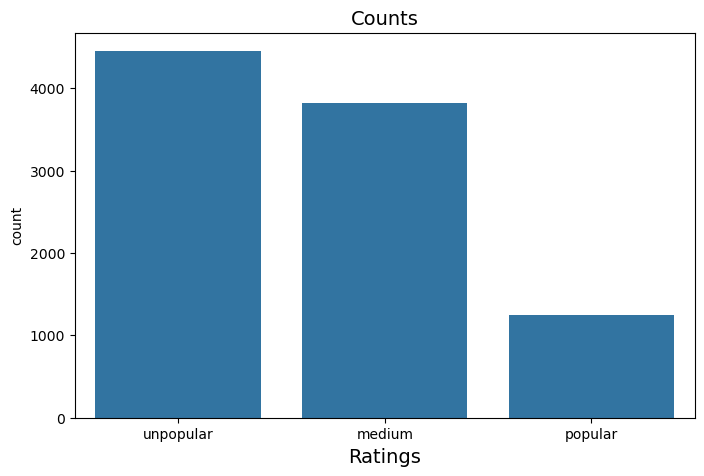

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
classified = df.copy()
classified['pop_rating'] = ''
for i, row in classified.iterrows():
    score = 'unpopular'
    if (row.popularity > 50) & (row.popularity < 70):
        score = 'medium'
    elif row.popularity >= 70:
        score = 'popular'
    classified.at[i, 'pop_rating'] = score

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
_ = sns.countplot(x='pop_rating', data=classified)
_ = plt.xlabel('Ratings', fontsize=14)
_ = plt.title('Counts', fontsize=14)
plt.show()


In [31]:
data = df.copy()
data.loc[((df.popularity >= 0) & (df.popularity <= 50)), "popularity_level" ] = 1
data.loc[((df.popularity > 50) & (df.popularity <= 70)), "popularity_level" ] = 2
data.loc[((df.popularity > 70) & (df.popularity <= 100)), "popularity_level" ] = 3
data["popularity_level"] = data["popularity_level"].astype("int")
data['popularity_level'].value_counts()

popularity_level
1    4450
2    3973
3    1093
Name: count, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

# Define target variable 'y' and features 'X'
y = data['popularity_level']
X = data.drop(columns=['popularity_level'])
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

# Define the preprocessing steps
preprocessor = ColumnTransformer([
    ('minmax', MinMaxScaler(), [
        'year', 'tempo', 'duration_mins', 'loudness', 
        'energy', 'speechiness', 'danceability', 'liveness', 
        'instrumentalness', 'valence',  
        'acousticness'
    ]),
    ('categorical', OneHotEncoder(), ['key'])
], remainder='passthrough')

# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Transform the training and test data
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
print(f"X_train_preprocessed shape: {X_train_preprocessed.shape}")
print(f"X_test_preprocessed shape: {X_test_preprocessed.shape}")

print(X_train_preprocessed.shape)
print(y_train.shape)
print(X_test_preprocessed.shape)
print(y_test.shape)


X_train_preprocessed shape: (7612, 24)
X_test_preprocessed shape: (1904, 24)
(7612, 24)
(7612,)
(1904, 24)
(1904,)


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

results = []
def run_model(model, alg_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cross_val_scores = cross_val_score(model, X_train, y_train, cv=6)
    cr = classification_report(y_test, y_pred)
    results.append((alg_name, accuracy, model))  
    # Print results
    print(f"Model: {alg_name}")
    print(f"Accuracy on Test Set for {alg_name} = {accuracy:.2f}\n")
    print(cr)
    print(f"{alg_name}: CrossVal Accuracy Mean: {cross_val_scores.mean():.2f} and Standard Deviation: {cross_val_scores.std():.2f} \n")
    
# K-Nearest Neighbors Classifier
model = KNeighborsClassifier()
run_model(model, "Nearest Neighbors Classifier", X_train, X_test, y_train, y_test)


Model: Nearest Neighbors Classifier
Accuracy on Test Set for Nearest Neighbors Classifier = 0.96

              precision    recall  f1-score   support

           1       0.97      0.98      0.97      1130
           2       0.95      0.96      0.95       981
           3       0.97      0.90      0.94       268

    accuracy                           0.96      2379
   macro avg       0.96      0.95      0.95      2379
weighted avg       0.96      0.96      0.96      2379

Nearest Neighbors Classifier: CrossVal Accuracy Mean: 0.96 and Standard Deviation: 0.01 



In [35]:
# Ensure stratified splitting of the data
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
# Define and run the model
def run_model(model, alg_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Perform Stratified K-Fold cross-validation
    skf = StratifiedKFold(n_splits=6)
    scores = cross_val_score(model, X_train, y_train, cv=skf)
    cr = classification_report(y_test, y_pred)
    # Store results
    results.append((alg_name, accuracy, model))
    print(f"Model: {alg_name}")
    print(f"Accuracy on Test Set for {alg_name} = {accuracy:.2f}\n")
    print(cr)
    print(f"{alg_name}: CrossVal Accuracy Mean: {scores.mean():.2f} and Standard Deviation: {scores.std():.2f} \n")

# Example with SVC Classifier
model = SVC(kernel='poly', degree=3, C=1)
run_model(model, "SVC Classifier")

Model: SVM Classifier
Accuracy on Test Set for SVM Classifier = 0.75

              precision    recall  f1-score   support

           1       0.87      0.85      0.86       890
           2       0.66      0.86      0.74       795
           3       0.00      0.00      0.00       219

    accuracy                           0.75      1904
   macro avg       0.51      0.57      0.53      1904
weighted avg       0.68      0.75      0.71      1904

SVM Classifier: CrossVal Accuracy Mean: 0.73 and Standard Deviation: 0.01 



c:\Users\Larry\anaconda3\envs\cmpt353\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Larry\anaconda3\envs\cmpt353\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Larry\anaconda3\envs\cmpt353\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# randomforest
# print(X_train_preprocessed.shape)
# print(y_train.shape)
# print(X_test_preprocessed.shape)
# print(y_test.shape)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize and train the RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42)

# use GridSearchCV to adjust parameters
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train_preprocessed, y_train)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test_preprocessed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
score1 = best_model.score(X_train_preprocessed, y_train)
score2 = best_model.score(X_test_preprocessed, y_test)

print(f"Model train score: {score1}")
print(f"Model test score: {score2}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally, save the model for future use
# import joblib
# joblib.dump(model, 'random_forest_model.pkl')

# print("Model saved as 'random_forest_model.pkl'")

Fitting 3 folds for each of 216 candidates, totalling 648 fits


c:\Users\Larry\anaconda3\envs\cmpt353\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Larry\anaconda3\envs\cmpt353\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Larry\anaconda3\envs\cmpt353\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Larry\anaconda3\envs\cmpt353\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constrain

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Model train score: 0.9966018302776515
Model test score: 0.9777027152913841
Mean Squared Error: 0.010217975315126053
R-squared: 0.9777027152913841


Inertia: 95890.05863208088
Silhouette Score: 0.13019040431664844


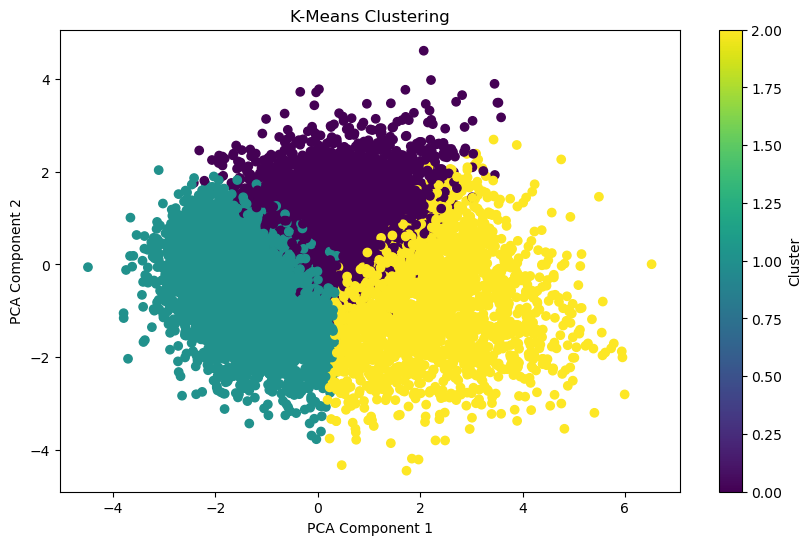

In [ ]:
# kmean
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Standardize the features
scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters (n_clusters) as needed
kmeans.fit(X_scaled)

# Predict the clusters
data['cluster'] = kmeans.predict(X_scaled)

# Visualize the clusters (optional, using PCA for 2D visualization)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
data['pca1'] = principal_components[:, 0]
data['pca2'] = principal_components[:, 1]

# Calculate inertia
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, data['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Visual inspection
plt.figure(figsize=(10, 6))
plt.scatter(data['pca1'], data['pca2'], c=data['cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()


In [41]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Define your ColumnTransformer
ctr = ColumnTransformer(
    transformers=[
        ('minmax', MinMaxScaler(), ['year', 'tempo', 'duration_mins', 'Weeks on Chart', 'loudness', 'energy', 'speechiness', 'danceability', 'liveness', 'instrumentalness', 'valence', 'Average Previous Week Position', 'acousticness']),
        ('categorical', OneHotEncoder(), ['key'])
    ],
    remainder='passthrough'
)

# Example training data
X_train = pd.DataFrame({
    'year': [2021, 2022],
    'tempo': [120, 130],
    'duration_mins': [3.5, 4.0],
    'Weeks on Chart': [5, 10],
    'loudness': [-5, -6],
    'energy': [0.7, 0.8],
    'speechiness': [0.03, 0.04],
    'danceability': [0.6, 0.65],
    'liveness': [0.1, 0.2],
    'instrumentalness': [0.0, 0.1],
    'valence': [0.5, 0.6],
    'Average Previous Week Position': [30, 20],
    'acousticness': [0.02, 0.03],
    'key': [1, 2]
})
y_train = [1, 2]  # Example target values

# Fit the ColumnTransformer on the training data
X_train_preprocessed = ctr.fit_transform(X_train)
nearest_neighbors_model = KNeighborsClassifier(n_neighbors=2) 
nearest_neighbors_model.fit(X_train_preprocessed, y_train)

# Example new data 
new_data = pd.DataFrame({
    'year': [2024],
    'tempo': [120],
    'duration_mins': [3.5],
    'Weeks on Chart': [5],
    'loudness': [-5],
    'energy': [0.7],
    'speechiness': [0.03],
    'danceability': [0.6],
    'liveness': [0.1],
    'instrumentalness': [0.0],
    'valence': [0.5],
    'Average Previous Week Position': [30],
    'acousticness': [0.02],
    'key': [1]
})

# Transform new data
new_data_preprocessed = ctr.transform(new_data)

# Make predictions
predictions = nearest_neighbors_model.predict(new_data_preprocessed)
probabilities = nearest_neighbors_model.predict_proba(new_data_preprocessed)

print("Predicted Popularity Level:", predictions)
print("Class Probabilities:", probabilities)
# Check if the transformed new data has the expected shape
print("New Data Preprocessed Shape:", new_data_preprocessed.shape)
# Check transformer and model information
print("ColumnTransformer:", ctr)
print("KNeighborsClassifier:", nearest_neighbors_model)



Predicted Popularity Level: [1]
Class Probabilities: [[0.5 0.5]]
New Data Preprocessed Shape: (1, 15)
ColumnTransformer: ColumnTransformer(remainder='passthrough',
                  transformers=[('minmax', MinMaxScaler(),
                                 ['year', 'tempo', 'duration_mins',
                                  'Weeks on Chart', 'loudness', 'energy',
                                  'speechiness', 'danceability', 'liveness',
                                  'instrumentalness', 'valence',
                                  'Average Previous Week Position',
                                  'acousticness']),
                                ('categorical', OneHotEncoder(), ['key'])])
KNeighborsClassifier: KNeighborsClassifier(n_neighbors=2)
